In [1]:
import pandas as pd
import os

train_data = pd.read_csv(os.getcwd()+'/data/BNP_data/train.csv')
test_data = pd.read_csv(os.getcwd()+'/data/BNP_data/test.csv')

# Fill NA values accordingly
from sklearn.base import TransformerMixin
import numpy as np

class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
train_data = DataFrameImputer().fit_transform(train_data)
test_data = DataFrameImputer().fit_transform(test_data)

# Convert string values to numeric
from sklearn import preprocessing

criteria = train_data.dtypes == object
object_columns = train_data[criteria.index[criteria]].columns

le = preprocessing.LabelEncoder()
for col in object_columns:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

# Cross-validation
from sklearn import cross_validation
X_train = train_data.drop('target', axis=1)
Y_train = train_data['target']

In [30]:
from sklearn.metrics import r2_score
import numpy as np

cols = X_train.drop('ID', axis=1).columns
r2_matrix = np.zeros((len(cols), len(cols)))

for i,col1 in enumerate(cols):
    for j,col2 in enumerate(cols):
        if j <= i:
            pass
        else:
            r2_matrix[(i,j)] = r2_score(X_train[col1], X_train[col2])


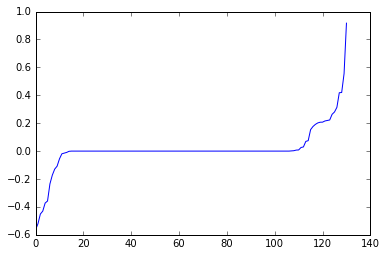

In [16]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.plot(np.sort(spr_matrix[91]))
plt.show()

In [39]:
#np.unravel_index(np.argwhere(r2_matrix > 0.9), r2_matrix.shape)
np.argwhere(r2_matrix > 0.9)

array([[  7,  45],
       [  7,  62],
       [ 24,  45],
       [ 24,  62],
       [ 24,  88],
       [ 32,  82],
       [ 42, 115],
       [ 45,  62]])

In [55]:
r2_matrix[(70, 74)]

0.58697150755738681

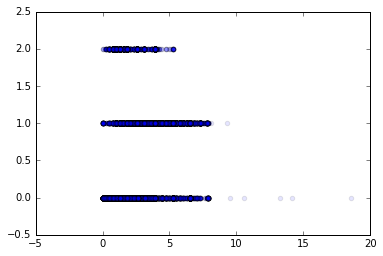

In [49]:
plt.scatter(X_train['v10'], X_train['v31'], alpha=0.1)
plt.show()

In [58]:
r2_score(X_train['v71'], X_train['v75'])

0.58697150755738681